# Generative models

0. Generative models ($G$) versus discriminative models ($D$)

    - Generative models learn the **joint** probability distribution: $p(x, y)$
    - Discriminative models learn **conditional** probability distribution $p(y|x)$
    - Examples:
        1. Naive Beyes vs Logistic Regression
        1. Generoator vs Discriminator in GAN
0. Generative models:
    - Naive Bayes
    - VAE
    - GANs
    - Flow-based generative models


In [1]:
from __future__ import division, print_function
import os, sys, json
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from scipy.spatial import distance as dist
from scipy import stats
from sklearn import preprocessing, manifold, decomposition, random_projection, neighbors, metrics, linear_model
from sklearn.model_selection import cross_val_score

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk', font_scale=1.2)
from IPython import display
np.random.seed(2018)
tf.set_random_seed(2018)


In [2]:
from utils import *

In [3]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
print (mnist.train.num_examples)
print (mnist.test.num_examples)

55000
10000


In [5]:
X_train, X_test = mnist.train.images, mnist.test.images
print (X_train.shape, X_test.shape)
labels_train = mnist.train.labels
n_samples = int(mnist.train.num_examples)
print (labels_train.shape)

(55000, 784) (10000, 784)
(55000,)


In [61]:
# A simple Logistic Regression model to classify the digits
logit = linear_model.LogisticRegression()
logit.fit(X_train, labels_train)
print(metrics.accuracy_score(mnist.test.labels, logit.predict(X_test)))

0.9198


In [6]:
from autoencoder_models.VariationalAutoencoder import VariationalAutoencoder
training_epochs = 20
batch_size = 128
display_step = 1
learning_rate=0.001

# VAE architecture: 784 -> 500 -> 500 -> 2 -> 500 -> 500 -> 784
vae2d = VariationalAutoencoder([784, 500, 500, 2], 
                               optimizer=tf.train.AdamOptimizer(learning_rate)
                              )


In [7]:
# Training loop
for epoch in range(training_epochs):
    avg_loss = 0.
    total_batch = int(n_samples / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        loss = vae2d.partial_fit(batch_xs)
        # Compute average loss
        avg_loss += loss / n_samples * batch_size
    # Display logs per epoch step
    if epoch % display_step == 0:
        print ("Epoch %d: loss = %.4f "% (epoch+1, avg_loss))

Epoch 1: loss = 3072.9763 
Epoch 2: loss = 2467.5982 
Epoch 3: loss = 2335.9921 
Epoch 4: loss = 2251.9287 
Epoch 5: loss = 2185.0294 
Epoch 6: loss = 2136.0591 
Epoch 7: loss = 2096.2911 
Epoch 8: loss = 2064.1282 
Epoch 9: loss = 2038.4297 
Epoch 10: loss = 2017.2171 
Epoch 11: loss = 1996.5535 
Epoch 12: loss = 1978.5143 
Epoch 13: loss = 1964.2217 
Epoch 14: loss = 1948.3527 
Epoch 15: loss = 1933.3584 
Epoch 16: loss = 1920.8766 
Epoch 17: loss = 1910.7802 
Epoch 18: loss = 1900.7900 
Epoch 19: loss = 1888.8229 
Epoch 20: loss = 1880.5028 


In [8]:
# VAE architecture: 784 -> 500 -> 500 -> 20 -> 500 -> 500 -> 784
vae20d = VariationalAutoencoder([784, 500, 500, 20], 
                               optimizer=tf.train.AdamOptimizer(learning_rate)
                              )


In [9]:
# Training loop
for epoch in range(training_epochs):
    avg_loss = 0.
    total_batch = int(n_samples / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        # Fit training using batch data
        loss = vae20d.partial_fit(batch_xs)
        # Compute average loss
        avg_loss += loss / n_samples * batch_size
    # Display logs per epoch step
    if epoch % display_step == 0:
        print ("Epoch %d: loss = %.4f "% (epoch+1, avg_loss))

Epoch 1: loss = 2480.9429 
Epoch 2: loss = 1152.4228 
Epoch 3: loss = 884.9967 
Epoch 4: loss = 772.5327 
Epoch 5: loss = 710.1519 
Epoch 6: loss = 663.3424 
Epoch 7: loss = 629.5100 
Epoch 8: loss = 598.9369 
Epoch 9: loss = 575.3241 
Epoch 10: loss = 555.8525 
Epoch 11: loss = 537.0772 
Epoch 12: loss = 521.5724 
Epoch 13: loss = 507.5270 
Epoch 14: loss = 493.2532 
Epoch 15: loss = 482.7542 
Epoch 16: loss = 472.4760 
Epoch 17: loss = 460.8844 
Epoch 18: loss = 453.4330 
Epoch 19: loss = 444.3493 
Epoch 20: loss = 437.1754 


In [11]:
Z_vae2d = vae2d.transform(X_train)
print (Z_vae2d.shape)
Z_vae20d = vae20d.transform(X_train)
print (Z_vae20d.shape)

(55000, 2)
(55000, 20)


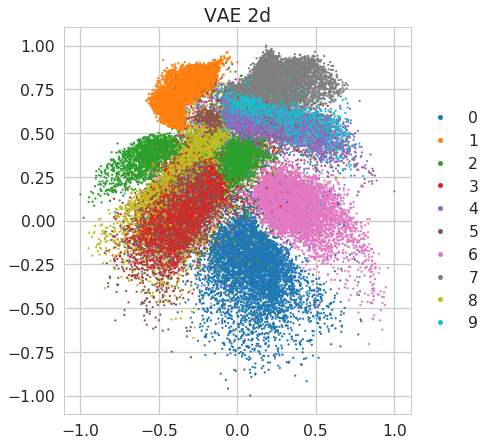

In [12]:
ax = plot_embed(Z_vae2d, labels_train)
ax.set_title('VAE 2d');

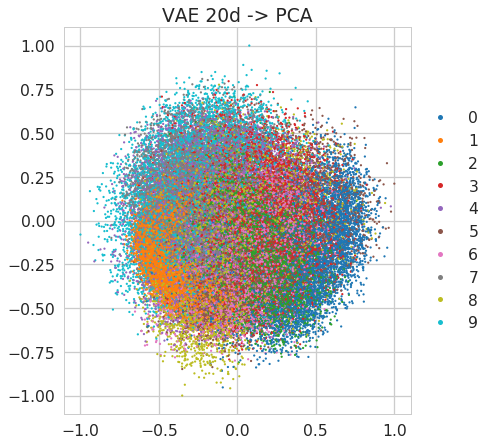

In [13]:
ax = plot_embed(decomposition.PCA(n_components=2).fit_transform(Z_vae20d), labels_train)
ax.set_title('VAE 20d -> PCA');

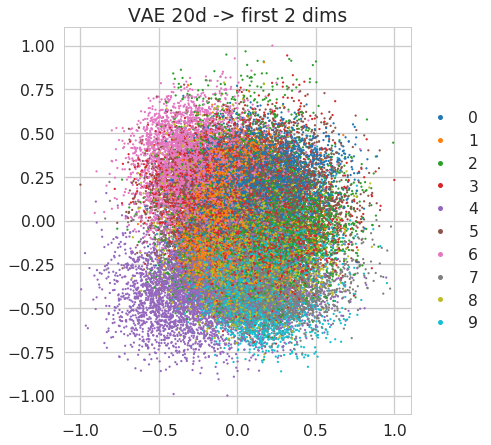

In [14]:
ax = plot_embed(Z_vae20d[:, :2], labels_train)
ax.set_title('VAE 20d -> first 2 dims');

In [15]:
# Examine the sigma from the VAE model
Z_vae_log_sigma_sq = vae2d.sess.run(vae2d.z_log_sigma_sq, feed_dict={vae2d.x: X_train})
Z_vae_log_sigma_sq.shape

(55000, 2)

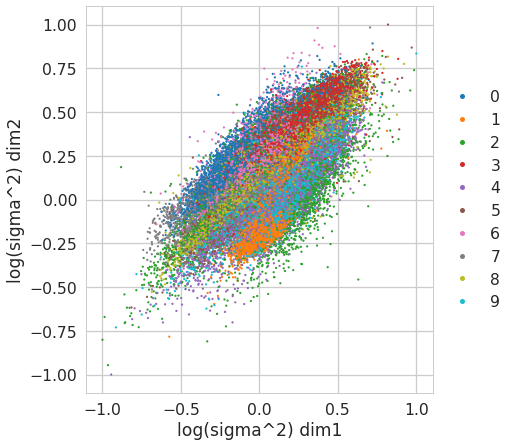

In [16]:
ax = plot_embed(Z_vae_log_sigma_sq, labels_train)
ax.set_xlabel('log(sigma^2) dim1')
ax.set_ylabel('log(sigma^2) dim2');

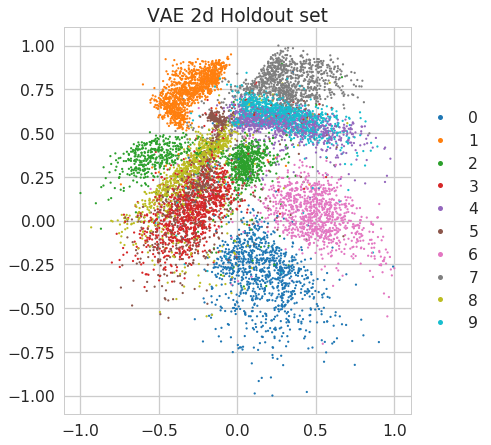

In [17]:
Z_test_vae2d = vae2d.transform(X_test)
ax = plot_embed(Z_test_vae2d, mnist.test.labels)
ax.set_title('VAE 2d Holdout set');

## Generating synthetic MNIST samples with generative models

In [18]:
x_gen = vae2d.generate()
x_gen.shape

(1, 784)

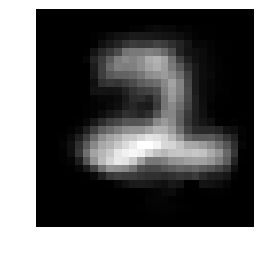

In [19]:
display_mnist_image(x_gen)

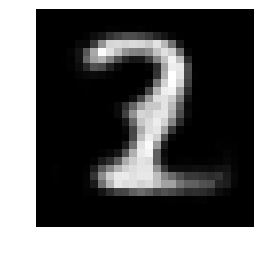

In [20]:
x_gen = vae20d.generate()
display_mnist_image(x_gen)

In [21]:
nx = ny = 20
x_values = np.linspace(-3, 3, nx)
y_values = np.linspace(-3, 3, ny)
# canvas = np.empty((28*ny, 28*nx))
z_uniform = np.empty((nx, ny, 2))

canvas = np.empty((28*ny, 28*nx))
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu = np.array([[xi, yi]])
        x_mean = vae2d.generate(z_mu)
        canvas[(nx-i-1)*28:(nx-i)*28, j*28:(j+1)*28] = x_mean[0].reshape(28, 28)


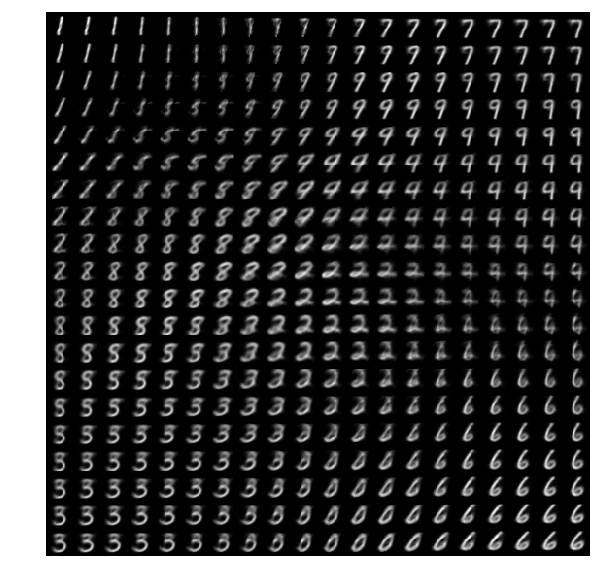

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(canvas, origin="upper", cmap="gray")
ax.set_axis_off()


(560, 560)


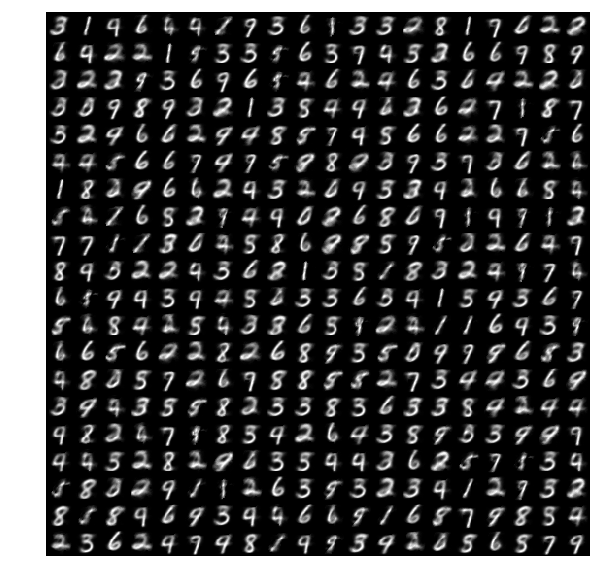

In [51]:
canvas = sample_latent_space(vae2d, 2, sample_type='uniform')
print(canvas.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(canvas, origin="upper", cmap="gray")
ax.set_axis_off()

(560, 560)


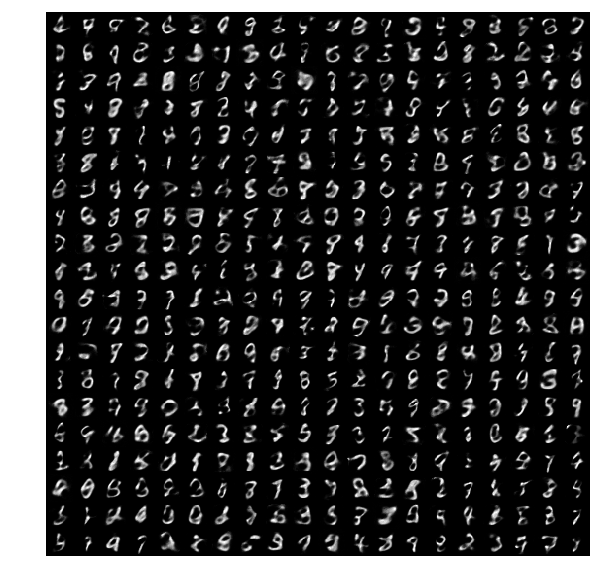

In [49]:
canvas = sample_latent_space(vae20d, 20, sample_type='normal')
print(canvas.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(canvas, origin="upper", cmap="gray")
ax.set_axis_off()

(560, 560)


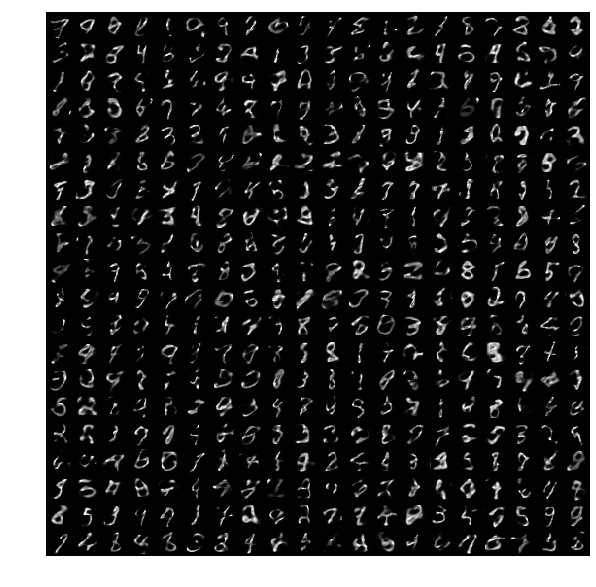

In [50]:
canvas = sample_latent_space(vae20d, 20, sample_type='uniform')
print(canvas.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(canvas, origin="upper", cmap="gray")
ax.set_axis_off()

(560, 560)


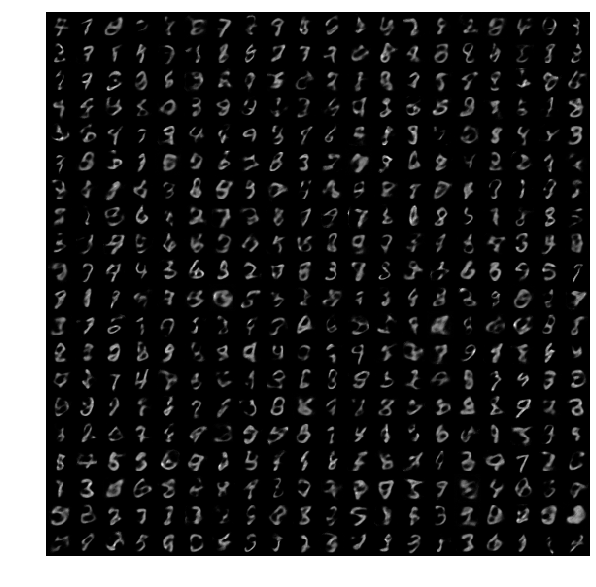

In [26]:
canvas = sample_latent_space(vae20d, 20, sample_type='normal')
print(canvas.shape)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(canvas, origin="upper", cmap="gray")
ax.set_axis_off()

In [ ]:
# Fit a Gaussian KDE for one digit
# kde = stats.gaussian_kde(X_vae[labels_train == 0])

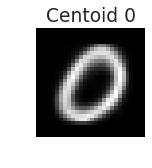

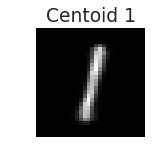

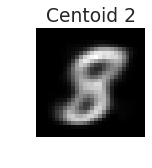

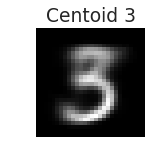

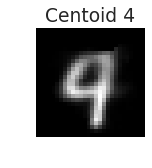

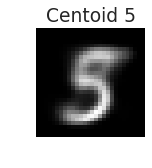

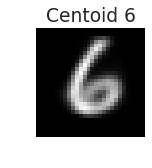

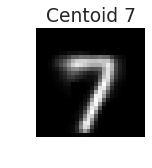

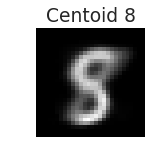

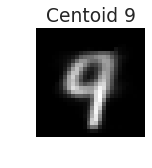

In [27]:
# Generate averages (centroid) of the digits in latent space
for i in range(10):
    z_i_avg = Z_vae2d[labels_train == i].mean(axis=0).reshape(1, -1)
    ax = display_mnist_image(vae2d.generate(z_i_avg), figsize=(2,2))
    ax.set_title('Centoid %d' % i)

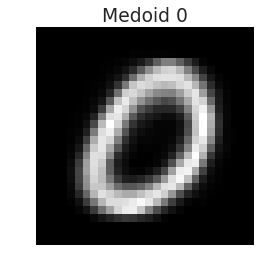

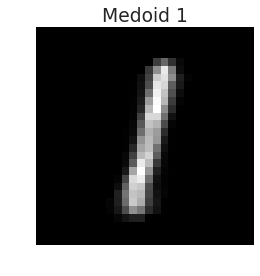

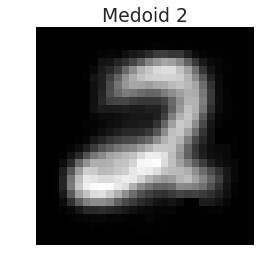

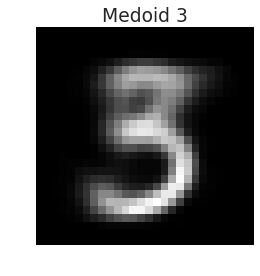

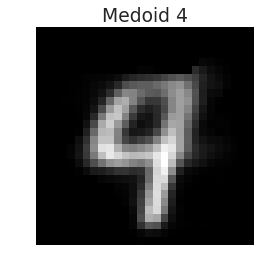

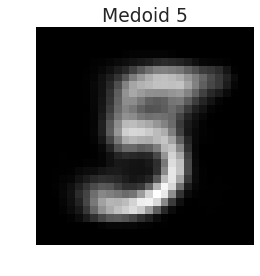

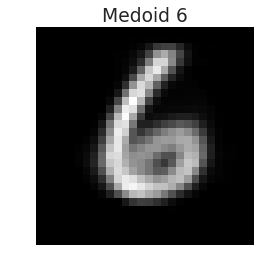

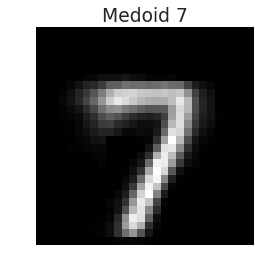

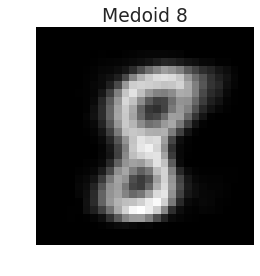

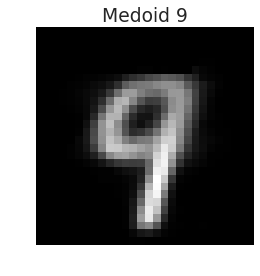

In [28]:
# Generate medians (medoid) of the digits in latent space
for i in range(10):
    z_i_avg = np.median(Z_vae2d[labels_train == i], axis=0).reshape(1, -1)
    ax = display_mnist_image(vae2d.generate(z_i_avg))
    ax.set_title('Medoid %d' % i)

### Task 1: Interpolation

Centoid of all class $a$ training samples in the latent space: 
$$ \mathbf{\overline{z}_a} = \frac{1}{m} \sum_{i=0}^m encode(\mathbf{x}_{a,i}) $$

Centoid of all class $b$ training samples in the latent space: 
$$ \mathbf{\overline{z}_b} = \frac{1}{n} \sum_{i=0}^n encode(\mathbf{x}_{b,i}) $$

The interpolation vector $\mathbf{z_{b \rightarrow a}}$ in the latent space from class $b$ to class $a$:
$$ \mathbf{z_{b \rightarrow a}} = \mathbf{\overline{z}_a} - \mathbf{\overline{z}_b} $$

Given any input vector of any class $\mathbf{x_c}$, we can manipulate the input with the interpolation vector by:

$$ \mathbf{z_c} = encode(\mathbf{x_c}) $$

$$ \mathbf{x_c'} = decode(\mathbf{z_c} + \alpha \mathbf{z_{b \rightarrow a}})$$

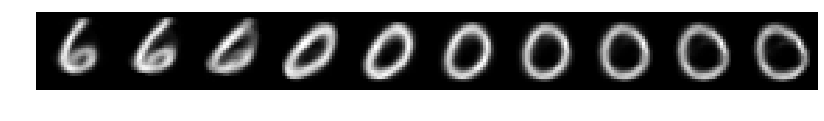

In [53]:
# Interpolate between two digits
z_0_avg = Z_vae2d[labels_train == 0].mean(axis=0)
z_6_avg = Z_vae2d[labels_train == 6].mean(axis=0)

# The interpolation vector pointing from 6 -> 0
z_6to0 = z_0_avg - z_6_avg

x_gens = []
for alpha in np.linspace(-1, 1, 10):
    z_interp = z_0_avg + alpha * z_6to0
#     ax = display_mnist_image(vae.generate(z_interp.reshape(1, -1)))
    x_gens.append(vae2d.generate(z_interp.reshape(1, -1)))
    
ax = display_mnist_images(x_gens, figsize=(14, 5))

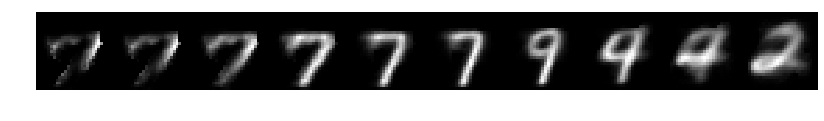

In [54]:
z_7_avg = Z_vae2d[labels_train == 7].mean(axis=0)

xs = []
for alpha in np.linspace(-1, 1, 10):
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(vae2d.generate(z_interp.reshape(1, -1)))

ax = display_mnist_images(xs, figsize=(14, 5))

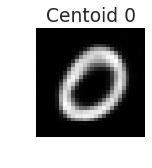

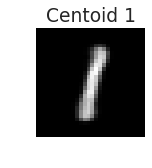

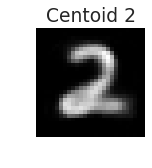

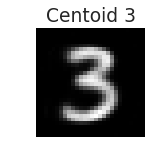

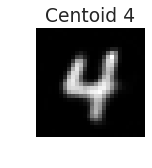

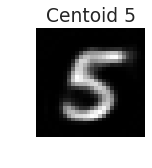

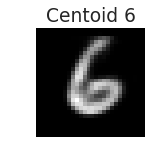

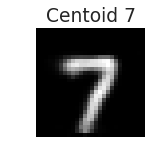

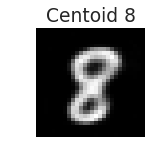

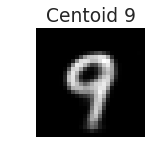

In [31]:
for i in range(10):
    z_i_avg = Z_vae20d[labels_train == i].mean(axis=0).reshape(1, -1)
    ax = display_mnist_image(vae20d.generate(z_i_avg), figsize=(2,2))
    ax.set_title('Centoid %d' % i)

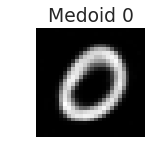

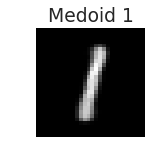

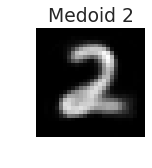

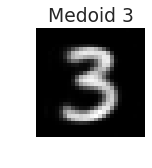

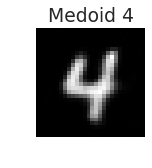

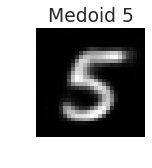

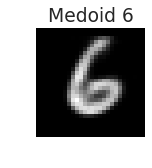

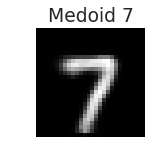

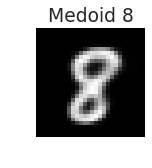

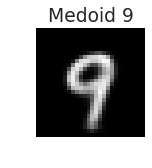

In [32]:
# Generate medians (medoid) of the digits in latent space
for i in range(10):
    z_i_avg = np.median(Z_vae20d[labels_train == i], axis=0).reshape(1, -1)
    ax = display_mnist_image(vae20d.generate(z_i_avg), figsize=(2,2))
    ax.set_title('Medoid %d' % i)

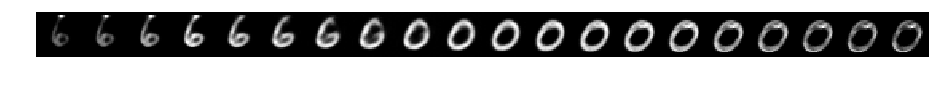

In [108]:
# Interpolate between two digits
z_0_avg = Z_vae20d[labels_train == 0].mean(axis=0)
z_6_avg = Z_vae20d[labels_train == 6].mean(axis=0)

# The interpolation vector pointing from 6 -> 0
z_6to0 = z_0_avg - z_6_avg

xs = []
alphas = np.linspace(-2, 2, 20)
for alpha in alphas:
    z_interp = z_0_avg + alpha * z_6to0
#     ax = display_mnist_image(vae.generate(z_interp.reshape(1, -1)))
    xs.append(vae20d.generate(z_interp.reshape(1, -1)))
    
ax = display_mnist_images(xs, figsize=(16, 5))

Text(0.5,0,'alpha')

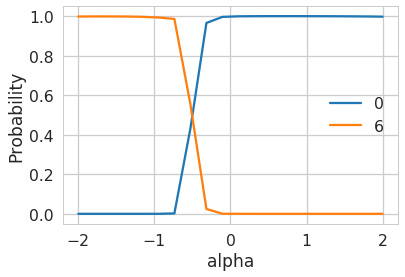

In [109]:
xs = np.array(xs)[:, 0, :]

xs_pred_probas = logit.predict_proba(xs)

fig, ax = plt.subplots()

ax.plot(alphas, xs_pred_probas[:, 0], label='0')
ax.plot(alphas, xs_pred_probas[:, 6], label='6')
ax.legend(loc='best')
ax.set_ylabel('Probability')
ax.set_xlabel('alpha')

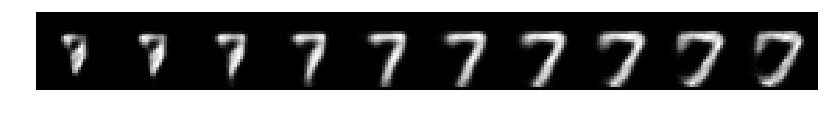

In [75]:
z_7_avg = Z_vae20d[labels_train == 7].mean(axis=0)

xs = []
for alpha in np.linspace(-1, 1, 10):
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(vae20d.generate(z_interp.reshape(1, -1)))

ax = display_mnist_images(xs, figsize=(14, 5))

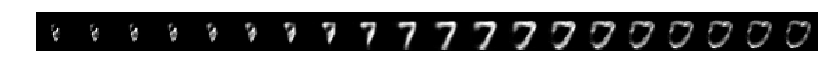

In [76]:
z_7_avg = Z_vae20d[labels_train == 7].mean(axis=0)

xs = []
for alpha in np.linspace(-3, 3, 20):
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(vae20d.generate(z_interp.reshape(1, -1)))

ax = display_mnist_images(xs, figsize=(14, 5))

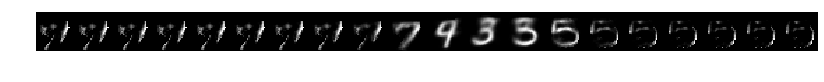

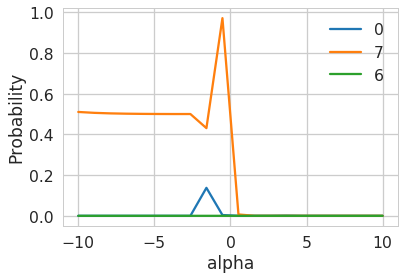

In [112]:
# Interpolate between two digits
z_0_avg = Z_vae2d[labels_train == 0].mean(axis=0)
z_6_avg = Z_vae2d[labels_train == 6].mean(axis=0)

# The interpolation vector pointing from 6 -> 0
z_6to0 = z_0_avg - z_6_avg

z_7_avg = Z_vae2d[labels_train == 7].mean(axis=0)

xs = []
alphas = np.linspace(-10, 10, 20)
for alpha in alphas:
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(vae2d.generate(z_interp.reshape(1, -1)))

ax = display_mnist_images(xs, figsize=(14, 5))

xs = np.array(xs)[:, 0, :]

xs_pred_probas = logit.predict_proba(xs)

fig, ax = plt.subplots()

ax.plot(alphas, xs_pred_probas[:, 0], label='0')
ax.plot(alphas, xs_pred_probas[:, 7], label='7')
ax.plot(alphas, xs_pred_probas[:, 6], label='6')
ax.legend(loc='best')
ax.set_ylabel('Probability')
ax.set_xlabel('alpha');

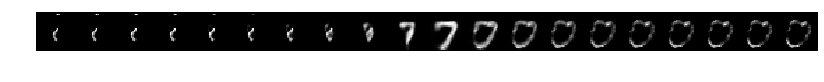

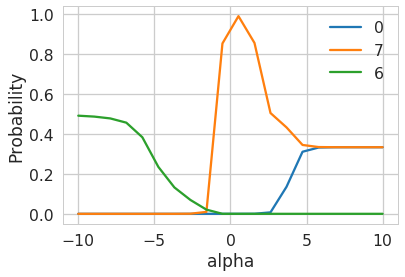

In [113]:
# Interpolate between two digits
z_0_avg = Z_vae20d[labels_train == 0].mean(axis=0)
z_6_avg = Z_vae20d[labels_train == 6].mean(axis=0)

# The interpolation vector pointing from 6 -> 0
z_6to0 = z_0_avg - z_6_avg

z_7_avg = Z_vae20d[labels_train == 7].mean(axis=0)

xs = []
alphas = np.linspace(-10, 10, 20)
for alpha in alphas:
    z_interp = z_7_avg + alpha * z_6to0
    xs.append(vae20d.generate(z_interp.reshape(1, -1)))

ax = display_mnist_images(xs, figsize=(14, 5))

xs = np.array(xs)[:, 0, :]

xs_pred_probas = logit.predict_proba(xs)

fig, ax = plt.subplots()

ax.plot(alphas, xs_pred_probas[:, 0], label='0')
ax.plot(alphas, xs_pred_probas[:, 7], label='7')
ax.plot(alphas, xs_pred_probas[:, 6], label='6')
ax.legend(loc='best')
ax.set_ylabel('Probability')
ax.set_xlabel('alpha');

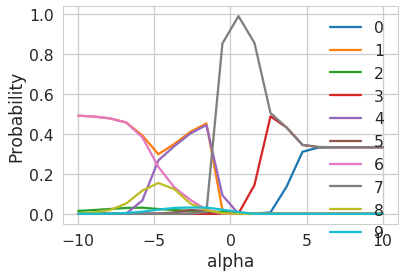

In [114]:
fig, ax = plt.subplots()

for i in range(10):
    ax.plot(alphas, xs_pred_probas[:, i], label=str(i))
ax.legend(loc='best')
ax.set_ylabel('Probability')
ax.set_xlabel('alpha');

In [115]:
# Main TFGAN library.
tfgan = tf.contrib.gan

In [116]:
# Shortcuts for later.
queues = tf.contrib.slim.queues
layers = tf.contrib.layers
ds = tf.contrib.distributions
framework = tf.contrib.framework


In [117]:
from mnist import data_provider
from mnist import util

ModuleNotFoundError: No module named 'mnist'

In [118]:
?tfgan.gan_model